This is a work-in progress play notebook to try my numpy / matplotlib / jupyter skills

# Demo of image calculation 

Using principles of Fourier Optics, we calculate a far-field image of a narrow slit illuminated by a single plane wave.  We will calculate the [diffraction pattern](https://en.m.wikipedia.org/wiki/Fraunhofer_diffraction_equation#Slit_of_infinite_depth), which is the electric field amplitude far away from the object, plotted by angle.

In [1]:
%matplotlib inline
from __future__ import unicode_literals

import matplotlib.pyplot as plt
import numpy as np

plt.xkcd()

## Object

A 1d narrow slit of width `2*halfSpace` , measured in wavelengths (λ).  After passing through the slit, we assume the light amplitude is 1 in the slit, and 0 outside.

For numerical purposes, we must assume the object is not infinite, but rather periodically repeating.  We will use `pitch` to represent the period.

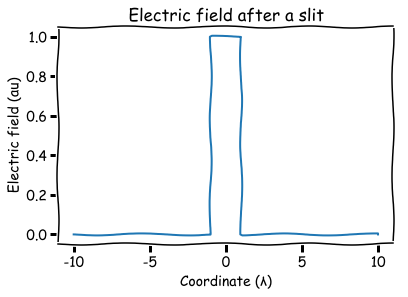

In [2]:
pitch = 20.
halfSpace = 1.
x = np.linspace( -pitch/2, pitch/2, 2001)
x = np.delete(x, -1)
funSpatial = np.array( np.abs(x) < halfSpace ) + 0.5 * np.array( np.abs(x) == halfSpace)
p = plt.plot( x, funSpatial)
plt.title('Electric field after a slit')
plt.xlabel(u'Coordinate (λ)')
plt.ylabel('Electric field (au)')

In [3]:
from numpy.fft import fft, fftshift, fftfreq


## Image calculation

Under our assumptions, the image (diffraction pattern) is simply a Fourier Transform of the input object, with appropriate scaling and centering.  We will shift the image, and apply scaling to get FFT results to match analytical.  Here `f` is the frequency (angle), and `funFrequency` is the diffraction pattern.

The numerical FFT produces slightly different results from analytical continuous Fourier Transform, we will look at the error.

In [4]:
funFrequency = fftshift( fft( fftshift( funSpatial ))) / sum(funSpatial)

f = fftshift( fftfreq( len(x), np.mean(np.diff(x))))

funFrequencyAnalytical = np.sinc( f * halfSpace * 2 )

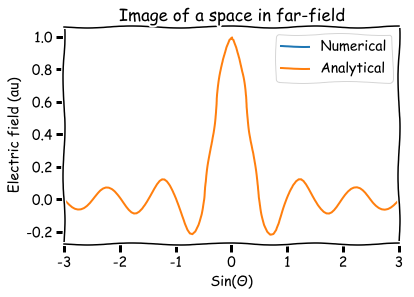

In [5]:
plt.plot(f, np.real(funFrequency) )
plt.plot(f, funFrequencyAnalytical )
plt.legend( ['Numerical','Analytical'])
plt.title('Image of a space in far-field')
plt.xlim(  [-3,3])
plt.xlabel('Sin(Θ)')
plt.ylabel("Electric field (au)")

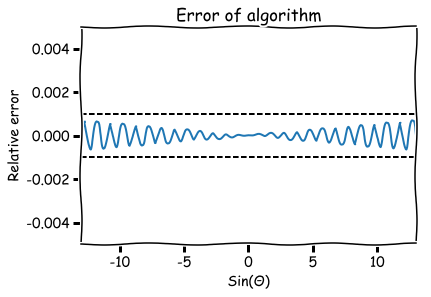

In [6]:
error = np.real(funFrequency) - funFrequencyAnalytical
plt.plot(f, error/max(funFrequencyAnalytical))
#plt.plot(f, np.imag(funFrequency))
plt.xlim([-13,13])
plt.ylim([-0.005,0.005])
plt.hlines([-0.001,0.001],-13,13,linestyles='dashed',label='limit')
plt.title('Error of algorithm')
plt.xlabel('Sin(Θ)')
plt.ylabel("Relative error")

In [7]:
# Check imaginary part, should be zero
np.imag(funFrequency[:5])

array([  1.01061986e-17,   1.07810523e-17,   5.37639154e-18,
         3.89642406e-18,   1.12955090e-17])